## EXPLORATION - GPG UK - Government Equalities Office

### Data
Employers with 250 or more employees must publish and report specific figures about their gender pay gap.

Source: [Government Equalities Office](https://data.gov.uk/dataset/54219db1-dd98-49d9-a383-a5978bb0aeb9/gender-pay-gap).

Overview: https://www.gov.uk/guidance/gender-pay-gap-reporting-make-your-calculations

Guide to calculations [here](https://www.gov.uk/guidance/gender-pay-gap-reporting-make-your-calculations).

About the [written publication](https://www.gov.uk/guidance/gender-pay-gap-reporting-what-employers-must-publish).

### Exploratory Data Analysis
1. General Info
2. Missing Values
3. Ordinal Proportions
4. Correlation Matrix
5. Diff Hourly Wage
6. Bonuses.
7. Quartiles
8. SicCodes
9. Reports PDF (Pending)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
# %matplotlib inline
# %config InlineBackend.figure_format='retina'
plt.rcParams["font.family"] = "sans-serif"
# sns.set(font='sans-serif')

In [36]:
# path = "data/gpg-equalities-office.csv"
df = None

def load_raw(df):
    path = "data/gender-pay-gap-uk-gov/2018.csv"
    df = pd.read_csv(path)
    return df

df = load_raw(df)
rows = df.shape[0]; cols = df.shape[1]
print(f"Rows: {rows}"); print(f"Cols: {cols}")

Rows: 10817
Cols: 25


## 1 General Info

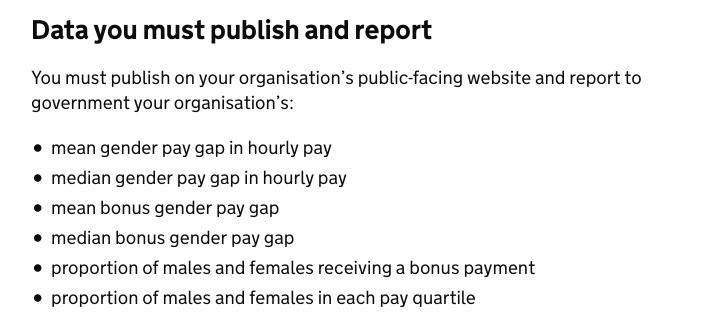

### Columns

1.   **EmployerName**
2.   **Address**
3.   **CompanyNumber**
4.   **SicCodes** Standard Industry Classification, four-digit code
5.   **DiffMeanHourlyPercent**
6.   **DiffMedianHourlyPercent**
7.   **DiffMeanBonusPercent**
8.   **DiffMedianBonusPercent**
9.   **MaleBonusPercent**
10.  **FemaleBonusPercent**
11.  **MaleLowerQuartile**
12.  **FemaleLowerQuartile**
13.  **MaleLowerMiddleQuartile**
13.  **FemaleLowerMiddleQuartile**
14.  **MaleUpperMiddleQuartile**
15.  **FemaleUpperMiddleQuartile**
14.  **MaleTopQuartile**
17.  **FemaleTopQuartile**
18.  **CompanyLinkToGPGInfo**
19.  **ResponsiblePerson**
20.  **EmployerSize** - 7 strates
21. **CurrentName**
22.  **SubmittedAfterTheDeadline**
23.  **DueDate**
24.  **DateSubmitted**         

In [37]:
df.head()

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nD...",00226143,85310,19.6,32.5,NaN,NaN,0.0,0.0,...,55.1,53.3,46.7,https://www.bryanston.co.uk/employment,Michael McGovern (Chief Operating Officer),500 to 999,BRYANSTON SCHOOL INCORPORATED,False,05/04/2019 00:00:00,03/04/2019 13:43:34
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\nLeith Walk,\r\nEdinburgh,...",SC016876,47730,7.7,-4.2,23.7,-75.2,22.2,82.0,...,88.4,20.3,79.7,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2019 00:00:00,01/04/2019 12:37:21
2,118 LIMITED,"3 Alexandra Gate Ffordd Pengam,\r\nGround Floo...",03951948,61900,7.7,12.7,11.3,10.9,67.0,52.0,...,50.0,56.0,44.0,NaN,Michael Graham (CEO),1000 to 4999,118 LIMITED,False,05/04/2019 00:00:00,06/03/2019 13:26:24
3,123 EMPLOYEES LTD,"34 Roundhay Road,\r\nLeeds,\r\nEngland,\r\nLS7...",10530651,78300,30.0,29.0,-10.0,69.0,46.0,74.0,...,83.0,25.0,75.0,NaN,Chloe Lines (Financial Controller),250 to 499,123 EMPLOYEES LTD,False,05/04/2019 00:00:00,03/04/2019 15:43:17
4,1509 GROUP,"Royal Grammar School,\r\nHigh Street,\r\nGuild...",04104101,"85200,\r\n85310",13.4,12.7,0.0,0.0,0.0,0.0,...,51.6,61.3,38.7,https://www.rgs-guildford.co.uk,Kate Perceval (Bursar),250 to 499,1509 GROUP,False,05/04/2019 00:00:00,18/03/2019 14:03:16


In [38]:
df.describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,10817.000000,10817.000000,9068.000000,9068.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.00000,10817.00000,10817.000000,10817.000000,10817.000000,10817.000000
mean,14.182555,11.882851,18.401390,-1.033855,35.706749,34.378941,46.115568,53.884432,50.17099,49.82901,54.384718,45.615282,60.253000,39.747000
std,14.243119,15.512442,219.025483,295.383196,36.675086,36.375891,24.113495,24.113495,26.19021,26.19021,26.318576,26.318576,24.487098,24.487098
min,-98.700000,-92.300000,-13934.000000,-14490.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4.900000,0.900000,0.000000,0.000000,0.700000,0.300000,27.000000,35.500000,29.00000,28.00000,33.000000,22.000000,41.000000,18.000000
50%,13.100000,9.500000,32.050000,15.550000,19.200000,17.100000,44.600000,55.400000,48.00000,52.00000,53.000000,47.000000,62.000000,38.000000
75%,22.400000,21.000000,56.600000,43.000000,75.100000,71.900000,64.500000,73.000000,72.00000,71.00000,78.000000,67.000000,82.000000,59.000000
max,100.000000,100.000000,134.200000,4000.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000


## 2 Missing values

#### Percentage of presence

In [39]:
def check_presence(df):
    return df.notnull().sum() / df.shape[0]
perc_of_presence = check_presence(df)
perc_of_presence

EmployerName                 1.000000
Address                      0.974947
CompanyNumber                0.876213
SicCodes                     0.953776
DiffMeanHourlyPercent        1.000000
DiffMedianHourlyPercent      1.000000
DiffMeanBonusPercent         0.838310
DiffMedianBonusPercent       0.838310
MaleBonusPercent             1.000000
FemaleBonusPercent           1.000000
MaleLowerQuartile            1.000000
FemaleLowerQuartile          1.000000
MaleLowerMiddleQuartile      1.000000
FemaleLowerMiddleQuartile    1.000000
MaleUpperMiddleQuartile      1.000000
FemaleUpperMiddleQuartile    1.000000
MaleTopQuartile              1.000000
FemaleTopQuartile            1.000000
CompanyLinkToGPGInfo         0.685957
ResponsiblePerson            0.844042
EmployerSize                 1.000000
CurrentName                  1.000000
SubmittedAfterTheDeadline    1.000000
DueDate                      1.000000
DateSubmitted                1.000000
dtype: float64

In [40]:
not_null_cols = df.columns[df.notnull().all()]
list(not_null_cols)

['EmployerName',
 'DiffMeanHourlyPercent',
 'DiffMedianHourlyPercent',
 'MaleBonusPercent',
 'FemaleBonusPercent',
 'MaleLowerQuartile',
 'FemaleLowerQuartile',
 'MaleLowerMiddleQuartile',
 'FemaleLowerMiddleQuartile',
 'MaleUpperMiddleQuartile',
 'FemaleUpperMiddleQuartile',
 'MaleTopQuartile',
 'FemaleTopQuartile',
 'EmployerSize',
 'CurrentName',
 'SubmittedAfterTheDeadline',
 'DueDate',
 'DateSubmitted']

#### Columns with empty values

In [41]:
cols_with_null = df.columns[df.isnull().any()]
list(cols_with_null)

['Address',
 'CompanyNumber',
 'SicCodes',
 'DiffMeanBonusPercent',
 'DiffMedianBonusPercent',
 'CompanyLinkToGPGInfo',
 'ResponsiblePerson']

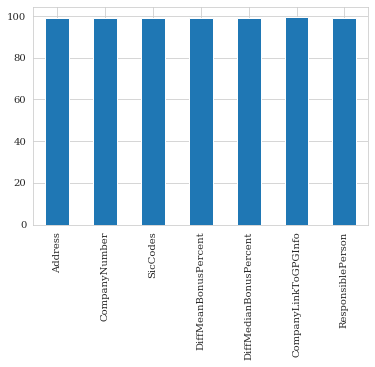

In [42]:
perc_of_absence = 100 - perc_of_presence
perc_of_absence[list(cols_with_null)].plot(x=cols_with_null, kind='bar')

## 3 Ordinal proportions

#### Company Size

Text(0, 0.5, 'Percentage of Companies')

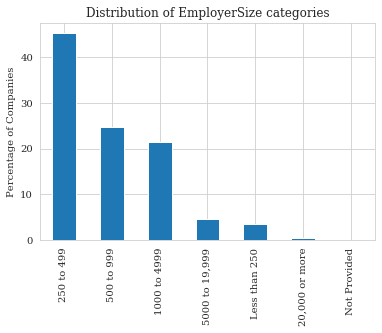

In [43]:
perc_company_size = (df['EmployerSize'].value_counts() / rows) * 100
ax = perc_company_size.plot(kind='bar',title='Distribution of EmployerSize categories')
ax.set_ylabel("Percentage of Companies")

#### Late submission

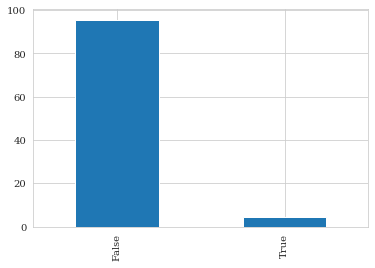

In [44]:
((df['SubmittedAfterTheDeadline'].value_counts() / rows) * 100).plot(kind='bar')

## 4 Correlations

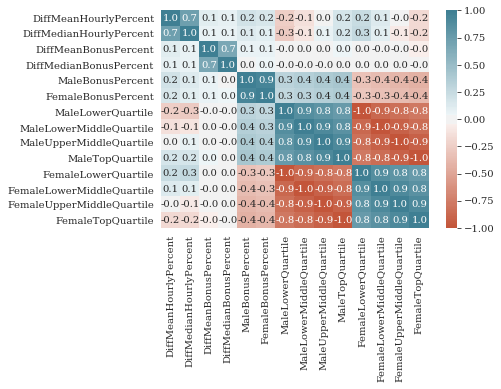

In [45]:
corr_mat = df[[
        'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent',
        'DiffMeanBonusPercent', 'DiffMedianBonusPercent',
        'MaleBonusPercent', 'FemaleBonusPercent',
        'MaleLowerQuartile', 'MaleLowerMiddleQuartile',
        'MaleUpperMiddleQuartile', 'MaleTopQuartile',
        'FemaleLowerQuartile','FemaleLowerMiddleQuartile',
        'FemaleUpperMiddleQuartile','FemaleTopQuartile',
    ]].corr()
sns.heatmap(corr_mat, annot=True, fmt='.1f', cmap=sns.diverging_palette(20, 220, n=200));

### **5 Diff Hourly Percent**

The **mean** hourly rate is the average hourly wage across the entire organisation so the mean gender pay gap is a measure of the difference between women’s mean hourly wage and men’s mean hourly wage.

The **median** hourly rate is calculated by ranking all employees from the highest paid to the lowest paid, and taking the hourly wage of the person in the middle; so the median gender pay gap is the difference between women’s median hourly wage (the middle paid woman) and men’s median hourly wage (the middle paid man).

In [46]:
print(df['DiffMeanHourlyPercent'].describe())
print(df['DiffMedianHourlyPercent'].describe())

count    10817.000000
mean        14.182555
std         14.243119
min        -98.700000
25%          4.900000
50%         13.100000
75%         22.400000
max        100.000000
Name: DiffMeanHourlyPercent, dtype: float64
count    10817.000000
mean        11.882851
std         15.512442
min        -92.300000
25%          0.900000
50%          9.500000
75%         21.000000
max        100.000000
Name: DiffMedianHourlyPercent, dtype: float64


In [47]:
lower_lim = -100
upper_lim =  100
# ax.set_ylim(lower_lim, upper_lim)
# ax.set_xlim(lower_lim, upper_lim)

ignored_means   = df.loc[df['DiffMeanHourlyPercent'] <= lower_lim]
ignored_medians = df.loc[df['DiffMedianHourlyPercent'] <= lower_lim]
ignored_indexes = list(set((list(ignored_means.index) + list(ignored_medians.index))))

/Users/delgard/opt/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


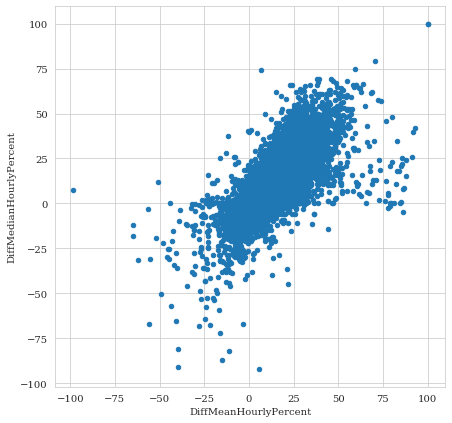

In [48]:
diff_mean_vs_median = df[['DiffMeanHourlyPercent', 'DiffMedianHourlyPercent']]
diff_mean_vs_median.drop(ignored_indexes, inplace=True)
diff_mean_vs_median.plot.scatter(x='DiffMeanHourlyPercent', y='DiffMedianHourlyPercent', figsize=(7,7))

       DiffMeanHourlyPercent  DiffMedianHourlyPercent
count           10817.000000             10817.000000
mean               14.182555                11.882851
std                14.243119                15.512442
min               -98.700000               -92.300000
25%                 4.900000                 0.900000
50%                13.100000                 9.500000
75%                22.400000                21.000000
max               100.000000               100.000000


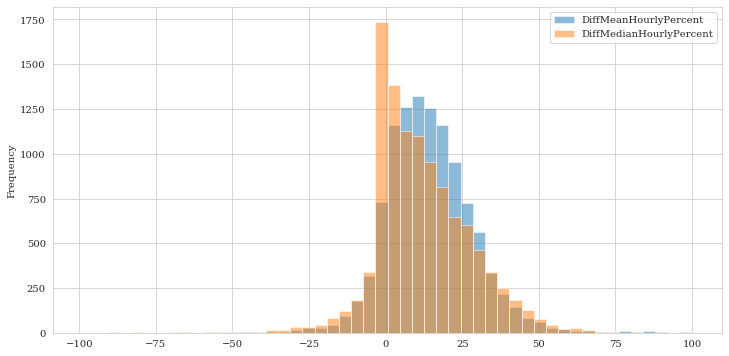

In [49]:
print(diff_mean_vs_median.describe())
diff_mean_vs_median.plot.hist(bins=50,alpha=0.5, figsize=(12,6),grid=True)

### 6 Bonus Percent

In [50]:
print(df['MaleBonusPercent'].describe())
print(df['FemaleBonusPercent'].describe())

count    10817.000000
mean        35.706749
std         36.675086
min          0.000000
25%          0.700000
50%         19.200000
75%         75.100000
max        100.000000
Name: MaleBonusPercent, dtype: float64
count    10817.000000
mean        34.378941
std         36.375891
min          0.000000
25%          0.300000
50%         17.100000
75%         71.900000
max        100.000000
Name: FemaleBonusPercent, dtype: float64


How many companies pay bonuses?

In [51]:
df['PayBonus'] = (df['MaleBonusPercent'] > 0) & (df['FemaleBonusPercent'] > 0)
df['PayBonus'].value_counts() / rows

True     0.748082
False    0.251918
Name: PayBonus, dtype: float64

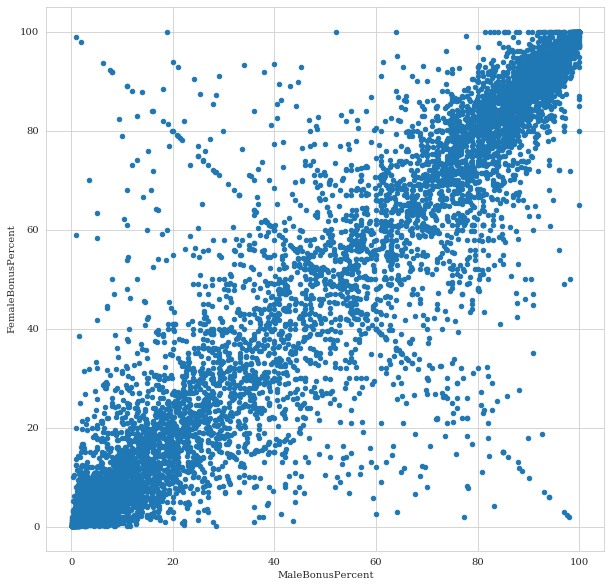

In [52]:
pay_bonus = df[df['PayBonus']]
pay_bonus.plot.scatter(x='MaleBonusPercent', y='FemaleBonusPercent', figsize=(10,10))

Sligh imbalance towards man.

Does the diagonal line mean people thought both percentages should sum 100?

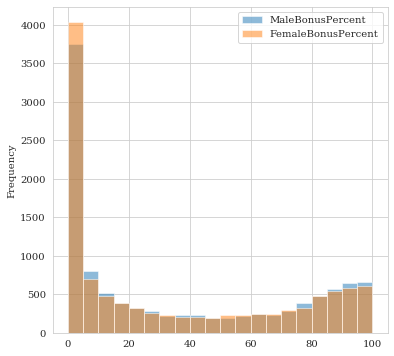

In [53]:
df[['MaleBonusPercent','FemaleBonusPercent']].plot.hist(bins=20,alpha=0.5,figsize=(6,6))

Female employees are granted with higher bonus only when it is 0-5%. In almost the rest man are slightly prefered. 

### 7 Quartiles
Pay quartiles are calculated by splitting all employees in an organisation into four even groups according to their level of pay. **Looking at the proportion of women in each quartile gives an indication of women's representation at different levels of the organisation**.

How quartiles are calculated can be found [here](https://www.gov.uk/guidance/gender-pay-gap-reporting-make-your-calculations#gender-pay-gap-quartile-figures-you-must-calculate).

In [54]:
female_quartiles = df[['FemaleLowerQuartile','FemaleLowerMiddleQuartile','FemaleUpperMiddleQuartile','FemaleTopQuartile']]
print(female_quartiles.describe())
female_quartiles.head()

       FemaleLowerQuartile  FemaleLowerMiddleQuartile  \
count         10817.000000                10817.00000   
mean             53.884432                   49.82901   
std              24.113495                   26.19021   
min               0.000000                    0.00000   
25%              35.500000                   28.00000   
50%              55.400000                   52.00000   
75%              73.000000                   71.00000   
max             100.000000                  100.00000   

       FemaleUpperMiddleQuartile  FemaleTopQuartile  
count               10817.000000       10817.000000  
mean                   45.615282          39.747000  
std                    26.318576          24.487098  
min                     0.000000           0.000000  
25%                    22.000000          18.000000  
50%                    47.000000          38.000000  
75%                    67.000000          59.000000  
max                   100.000000         100.000000  


,FemaleLowerQuartile,FemaleLowerMiddleQuartile,FemaleUpperMiddleQuartile,FemaleTopQuartile
0,67.6,61.8,55.1,46.7
1,68.4,87.3,88.4,79.7
2,59.0,55.0,50.0,44.0
3,100.0,98.0,83.0,75.0
4,61.9,56.4,51.6,38.7


### Female Representation per quartile

In [55]:
male_quartile = df[['MaleLowerQuartile', 'MaleLowerMiddleQuartile', 'MaleUpperMiddleQuartile', 'MaleTopQuartile']]
male_quartile['Sex'] = "Male"
male_quartile.rename(columns={
    "MaleLowerQuartile": "Lower",
    "MaleLowerMiddleQuartile": "LowerMiddle",
    "MaleUpperMiddleQuartile": "UpperMiddle",
    "MaleTopQuartile": "Top",
}, inplace=True)
male_quartile.shape

/Users/delgard/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(10817, 5)

In [56]:
female_quartile = df[["FemaleLowerQuartile", "FemaleLowerMiddleQuartile", "FemaleUpperMiddleQuartile", "FemaleTopQuartile"]]
female_quartile["Sex"] = "Female"
female_quartile.rename(columns={
    "FemaleLowerQuartile": "Lower",
    "FemaleLowerMiddleQuartile": "LowerMiddle",
    "FemaleUpperMiddleQuartile": "UpperMiddle",
    "FemaleTopQuartile": "Top",
}, inplace=True)
female_quartile.shape

/Users/delgard/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(10817, 5)

In [57]:
quartiles = male_quartile.append(female_quartile)
quartiles.shape

(21634, 5)

In [58]:
melt_quartiles = pd.melt(quartiles,
        id_vars=['Sex'], var_name='Quartile',
        value_vars=['Lower', 'LowerMiddle', 'UpperMiddle', 'Top'],
        value_name='Percentage'
)
melt_quartiles.sample(5)

,Sex,Quartile,Percentage
73245,Male,Top,17.3
17011,Female,Lower,50.0
58671,Female,UpperMiddle,83.0
16398,Female,Lower,43.8
10707,Male,Lower,35.2


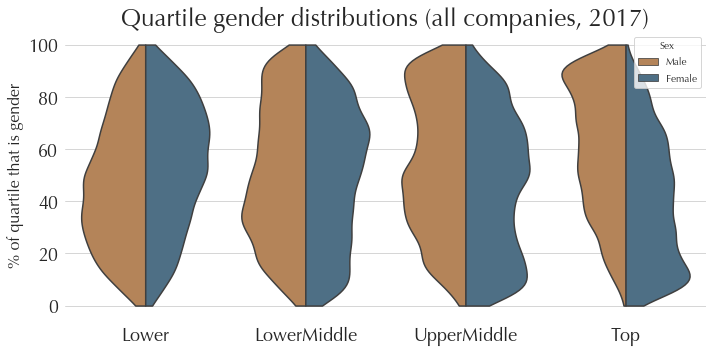

In [86]:
from matplotlib.lines import Line2D
from matplotlib import colors
import matplotlib as mpl
sns.set_style("whitegrid", {
    'font.family': 'Optima',
})
mpl.rcParams['font.family'] = 'Optima'
mpl.rcParams['text.usetex'] = 'False'


fig, ax = plt.subplots(figsize=(10,5))
ax.set_title("Quartile gender distributions (all companies, 2017)", **{'fontsize': 24})
sns.despine(left=True, bottom=True)
palette = sns.color_palette(None, n_colors=8, desat=.5)
x = palette[0]
y = palette[1]
palette[1] = palette[0]
palette[0] = y
ax = sns.violinplot(
    data=melt_quartiles, x="Quartile", y="Percentage", hue="Sex", ax=ax, cut=0, split=True,
     inner=None, palette=palette
)
plt.tick_params(axis='y', which='both', labelleft=True, labelright=False, labelsize=18)
plt.tick_params(axis='x', which='both', labeltop=False, labelbottom=True, labelsize=18)
ax.set_xlabel('')
ax.set_ylabel('% of quartile that is gender', **{'fontsize': 16})

plt.tight_layout()
fig.savefig("Visualizations/2017-all-companies-quartiles.png", dpi=150)

### 8 SicCodes

In [60]:
# df = load_raw(df)
df['SicCodes'] = df['SicCodes'].astype(str)
df['SicCodes'].value_counts()

nan                                    500
82990                                  450
1,\r\n84110                            356
70100                                  249
1,\r\n85310                            236
                                      ... 
85410,\r\n85422                          1
77352                                    1
26400,\r\n26702,\r\n46431,\r\n46510      1
55900,\r\n88990                          1
78109,\r\n85100                          1
Name: SicCodes, Length: 2005, dtype: int64

In [61]:
df['SicCodes'] = df['SicCodes'].apply(lambda sic_code: sic_code\
                                 .replace('\r','').replace('\n','')\
                                 .split(','))
df['SicCodes'].head(10)

0                  [85310]
1                  [47730]
2                  [61900]
3                  [78300]
4           [85200, 85310]
5                  [93110]
6    [93110, 93130, 93290]
7                  [78109]
8           [86900, 88100]
9                  [56290]
Name: SicCodes, dtype: object

In [62]:
print(df.shape)
df = df.explode('SicCodes')
print(df.shape)

(10817, 26)
(16247, 26)


In [63]:
df['SicCodes'].value_counts()

1        1834
85310     654
82990     578
nan       500
85200     438
         ... 
30400       1
99000       1
47781       1
46210       1
15120       1
Name: SicCodes, Length: 622, dtype: int64

In [64]:
# replace NaN to encode
df['SicCodes'] = df['SicCodes'].replace(to_replace='nan', value='0')
df['SicCodes'].value_counts()

1        1834
85310     654
82990     578
0         500
85200     438
         ... 
30400       1
99000       1
47781       1
46210       1
15120       1
Name: SicCodes, Length: 622, dtype: int64

In [65]:
# Change type to int in order to match with SicCodes
df['SicCodes'] = df['SicCodes'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16247 entries, 0 to 10816
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EmployerName               16247 non-null  object 
 1   Address                    15939 non-null  object 
 2   CompanyNumber              13747 non-null  object 
 3   SicCodes                   16247 non-null  int64  
 4   DiffMeanHourlyPercent      16247 non-null  float64
 5   DiffMedianHourlyPercent    16247 non-null  float64
 6   DiffMeanBonusPercent       13170 non-null  float64
 7   DiffMedianBonusPercent     13169 non-null  float64
 8   MaleBonusPercent           16247 non-null  float64
 9   FemaleBonusPercent         16247 non-null  float64
 10  MaleLowerQuartile          16247 non-null  float64
 11  FemaleLowerQuartile        16247 non-null  float64
 12  MaleLowerMiddleQuartile    16247 non-null  float64
 13  FemaleLowerMiddleQuartile  16247 non-null  flo

#### Exploring SicCodes dataset

In [66]:
sic_codes = pd.read_csv("data/siccodes/uk-sic-2007-condensed_csv.csv")
print(sic_codes.shape)
sic_codes.head(30)

(731, 5)


,sic_code,sic_description,section,section_description,sic_version
0,1110,"Growing of cereals (except rice), leguminous c...",A,"Agriculture, Forestry and Fishing",SIC 2007
1,1120,Growing of rice,A,"Agriculture, Forestry and Fishing",SIC 2007
2,1130,"Growing of vegetables and melons, roots and tu...",A,"Agriculture, Forestry and Fishing",SIC 2007
3,1140,Growing of sugar cane,A,"Agriculture, Forestry and Fishing",SIC 2007
4,1150,Growing of tobacco,A,"Agriculture, Forestry and Fishing",SIC 2007
5,1160,Growing of fibre crops,A,"Agriculture, Forestry and Fishing",SIC 2007
6,1190,Growing of other non-perennial crops,A,"Agriculture, Forestry and Fishing",SIC 2007
7,1210,Growing of grapes,A,"Agriculture, Forestry and Fishing",SIC 2007
8,1220,Growing of tropical and subtropical fruits,A,"Agriculture, Forestry and Fishing",SIC 2007
9,1230,Growing of citrus fruits,A,"Agriculture, Forestry and Fishing",SIC 2007


In [67]:
sic_codes.nunique()

sic_code               731
sic_description        731
section                 21
section_description     21
sic_version              1
dtype: int64

In [68]:
sic_codes.drop('sic_version', axis='columns', inplace=True)
sic_codes.columns

Index(['sic_code', 'sic_description', 'section', 'section_description'], dtype='object')

In [69]:
sic_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   sic_code             731 non-null    int64 
 1   sic_description      731 non-null    object
 2   section              731 non-null    object
 3   section_description  731 non-null    object
dtypes: int64(1), object(3)
memory usage: 23.0+ KB


In [70]:
sic_codes = sic_codes.rename(columns={"sic_code": "SicCodes"})

#### Merge Description

In [71]:
# This drops 0's (NaN) an 1's (Unknown data)
mdf = pd.merge(df, sic_codes, on=['SicCodes'])
mdf.shape

(13913, 29)

In [72]:
check_presence(mdf)

EmployerName                 1.000000
Address                      0.997772
CompanyNumber                0.903328
SicCodes                     1.000000
DiffMeanHourlyPercent        1.000000
DiffMedianHourlyPercent      1.000000
DiffMeanBonusPercent         0.835190
DiffMedianBonusPercent       0.835118
MaleBonusPercent             1.000000
FemaleBonusPercent           1.000000
MaleLowerQuartile            1.000000
FemaleLowerQuartile          1.000000
MaleLowerMiddleQuartile      1.000000
FemaleLowerMiddleQuartile    1.000000
MaleUpperMiddleQuartile      1.000000
FemaleUpperMiddleQuartile    1.000000
MaleTopQuartile              1.000000
FemaleTopQuartile            1.000000
CompanyLinkToGPGInfo         0.685905
ResponsiblePerson            0.861640
EmployerSize                 1.000000
CurrentName                  1.000000
SubmittedAfterTheDeadline    1.000000
DueDate                      1.000000
DateSubmitted                1.000000
PayBonus                     1.000000
sic_descript

In [73]:
mdf['SicCodes'].value_counts()

85310    654
82990    578
85200    438
84110    383
70100    349
        ... 
46360      1
23650      1
46160      1
47410      1
15110      1
Name: SicCodes, Length: 620, dtype: int64

,section,section_description
13912,A,"Agriculture, Forestry and Fishing"
9903,B,Mining and Quarrying
5229,C,Manufacturing
12928,D,"Electricity, gas, steam and air conditioning s..."
11710,E,"Water supply, sewerage, waste management and"
12863,F,Construction
4872,G,Wholesale and retail trade; repair of motor ve...
5907,H,Transportation and storage
5302,I,Accommodation and food service activities
7453,J,Information and communication


\emph{{Code}} & \emph{{Description}} & \\\hline
A & Agriculture, Forestry and Fishing \\
B & Mining and Quarrying \\
C & Manufacturing \\
D & Electricity, gas, steam and air conditioning supply \\
E & Water supply, sewerage, waste management and \\
F & Construction \\
G & Wholesale and retail trade; repair of motor vehicles and \\
H & Transportation and storage \\
I & Accommodation and food service activities \\
J & Information and communication \\
K & Financial and insurance activities \\
L & Real estate activities \\
M & Professional, scientific and technical activities \\
N & Administrative and support service activities \\
O & Public administration and defence; compulsory social \\
P & Education \\
Q & Human health and social work activities \\
R & Arts, entertainment and recreation \\
S & Other service activities \\
T & Activities of households as employers; undifferentiated \\
U & Activities of extraterritorial organisations and \\
\hline


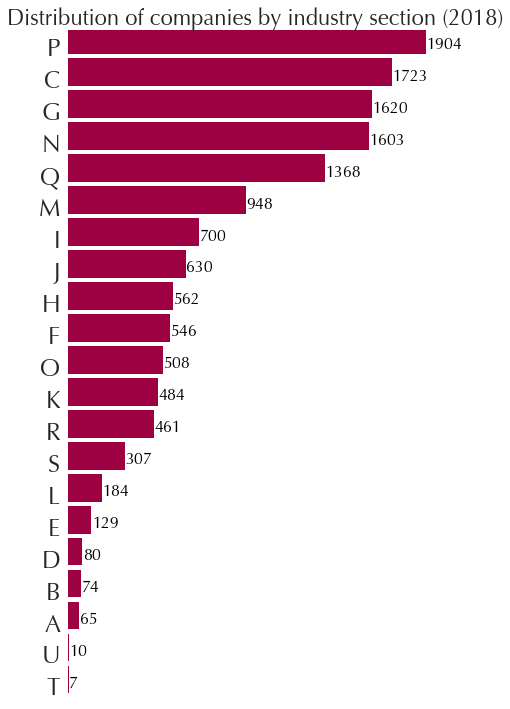

In [87]:


tmp = mdf[['section', 'section_description']].sort_values(by='section').drop_duplicates()
display(tmp)

fig, ax = plt.subplots(1,1, figsize=(7,10))

tmp = mdf['section'].value_counts().sort_values().plot(kind='barh',ax=ax,cmap='Spectral')
ax.set_title("Distribution of companies by industry section (2018)", **{'fontsize': '22'})

ax.set_xlabel("Number of companies")
plt.tick_params(axis='y', which='both', labelleft=True, labelright=False, labelsize=24)
plt.tick_params(axis='x', which='both', labeltop=False, labelbottom=True, labelsize=18)
ax.set_xlabel('')
for container in ax.containers:
    plt.setp(container, height=0.9)
        
for i, v in enumerate(mdf['section'].value_counts().sort_values()):
    ax.text(v + 3, i - .06, str(v), color='k', fontsize='16')

plt.xlim([0, 2000])
ax.set_xticks([])
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
       
plt.tight_layout()
fig.savefig("Visualizations/2018-all-companies-sectors.png", dpi=100)

print("\\emph{{Code}} & \\emph{{Description}} & \\\\\\hline")
for idx, data in mdf[['section', 'section_description']].sort_values(by='section').drop_duplicates().iterrows():
    print("{} & {} \\\\".format(data.section, data.section_description))
print("\\hline")


In [78]:
education = mdf[mdf['section_description']=='Education']
education[education.EmployerName.str.contains('Bristol')]

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted,PayBonus,sic_description,section,section_description
76,Bristol Grammar School,"Bristol Grammar School,\r\nUniversity Road,\r\...",05142007,85310,10.1,18.7,NaN,NaN,0.0,0.0,...,Gerry Mitchell (Bursar),250 to 499,BRISTOL GRAMMAR SCHOOL,False,05/04/2019 00:00:00,02/04/2019 09:09:11,False,General secondary education,P,Education
115,City of Bristol College,"College Green Centre,\r\nSt George's Road,\r\n...",NaN,85310,8.1,12.9,NaN,NaN,0.0,0.0,...,NaN,500 to 999,City of Bristol College,False,31/03/2019 00:00:00,28/03/2019 16:37:51,False,General secondary education,P,Education
138,Diocese of Bristol Academies Trust,"First Floor Hillside House 1500 Parkway North,...",08156759,85310,26.9,32.6,NaN,NaN,0.0,0.0,...,NaN,250 to 499,DIOCESE OF BRISTOL ACADEMIES TRUST,False,31/03/2019 00:00:00,28/03/2019 10:18:56,False,General secondary education,P,Education
847,Bristol Grammar School,"Bristol Grammar School,\r\nUniversity Road,\r\...",05142007,85200,10.1,18.7,NaN,NaN,0.0,0.0,...,Gerry Mitchell (Bursar),250 to 499,BRISTOL GRAMMAR SCHOOL,False,05/04/2019 00:00:00,02/04/2019 09:09:11,False,Primary education,P,Education
885,Diocese of Bristol Academies Trust,"First Floor Hillside House 1500 Parkway North,...",08156759,85200,26.9,32.6,NaN,NaN,0.0,0.0,...,NaN,250 to 499,DIOCESE OF BRISTOL ACADEMIES TRUST,False,31/03/2019 00:00:00,28/03/2019 10:18:56,False,Primary education,P,Education
7205,Diocese of Bristol Academies Trust,"First Floor Hillside House 1500 Parkway North,...",08156759,85600,26.9,32.6,NaN,NaN,0.0,0.0,...,NaN,250 to 499,DIOCESE OF BRISTOL ACADEMIES TRUST,False,31/03/2019 00:00:00,28/03/2019 10:18:56,False,Educational support services,P,Education
9221,Diocese of Bristol Academies Trust,"First Floor Hillside House 1500 Parkway North,...",08156759,85100,26.9,32.6,NaN,NaN,0.0,0.0,...,NaN,250 to 499,DIOCESE OF BRISTOL ACADEMIES TRUST,False,31/03/2019 00:00:00,28/03/2019 10:18:56,False,Pre-primary education,P,Education
9505,University Of Bristol,"Senate House,\r\nBristol,\r\nAvon,\r\nBS8 1UB",RC000648,85421,19.6,13.6,79.9,60.7,4.0,4.9,...,NaN,"5000 to 19,999",UNIVERSITY OF BRISTOL,False,31/03/2019 00:00:00,27/03/2019 11:50:24,True,First-degree level higher education,P,Education
